In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as st


In [192]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [126]:
churn=pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [127]:
churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [128]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [129]:
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [130]:
churn.shape

(7043, 21)

In [131]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [132]:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [133]:
churn.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [134]:
# Drop Unwanted Columns Whos Not Use In Build a Machine Learning Model
churn.drop(columns=['customerID'],inplace=True)

In [135]:
# Print The Unique Values In All The Columns
for col in churn.columns:
  print(f'{col}:{churn[col].unique()}')
  print("-"*50)

gender:['Female' 'Male']
--------------------------------------------------
SeniorCitizen:[0 1]
--------------------------------------------------
Partner:['Yes' 'No']
--------------------------------------------------
Dependents:['No' 'Yes']
--------------------------------------------------
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
--------------------------------------------------
PhoneService:['No' 'Yes']
--------------------------------------------------
MultipleLines:['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService:['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity:['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup:['Yes' 'No' 'No internet service']
-------

In [136]:
numerical_feataure_list=['tenaure','MonthlyCharges','TotalCharges']
for col in churn.columns:
  if col in numerical_feataure_list:
    print(f'{col}:{churn[col].unique()}')
    print("-"*50)



MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
--------------------------------------------------
TotalCharges:['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
--------------------------------------------------


In [137]:
churn['TotalCharges'] = churn['TotalCharges'].replace(' ', np.nan)
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [138]:
# Checking the class distribution columns
churn['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [139]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Numerical Feature Analysis

In [140]:
def plot_histogram(dataframe, column_name):
    plt.figure(figsize=(6,3))
    st.histplot(dataframe[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')


    col_mean=dataframe[column_name].mean()
    col_median=dataframe[column_name].median()
    col_std=dataframe[column_name].std()

    print(f'Mean: {col_mean}')
    print(f'Median: {col_median}')
    print(f'Standard Deviation: {col_std}')


    plt.axvline(col_mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(col_median, color='g', linestyle='dashed', linewidth=2)
    plt.legend()
    plt.show()

Mean: 32.37114865824223
Median: 29.0
Standard Deviation: 24.55948102309423


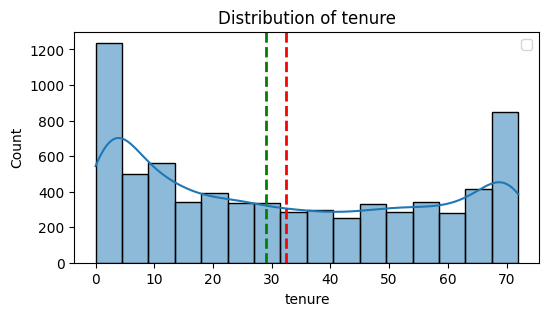

In [141]:
plot_histogram(churn, 'tenure')

Mean: 64.76169246059918
Median: 70.35
Standard Deviation: 30.09004709767854


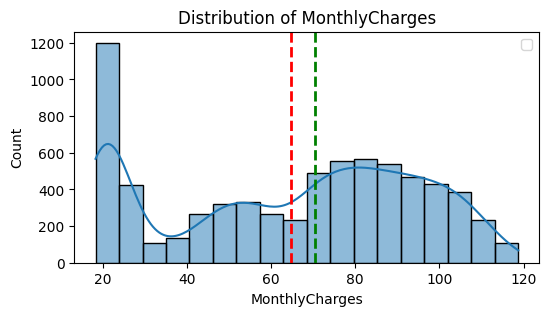

In [142]:
plot_histogram(churn, 'MonthlyCharges')

Mean: 2283.3004408418656
Median: 1397.475
Standard Deviation: 2266.7713618831453


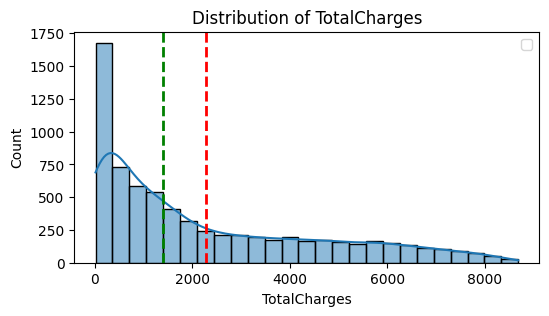

In [143]:
plot_histogram(churn, 'TotalCharges')

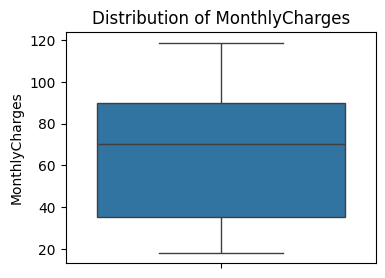

In [144]:
plt.figure(figsize=(4,3))
sns.boxplot(churn['MonthlyCharges'])
plt.title('Distribution of MonthlyCharges')
plt.show()

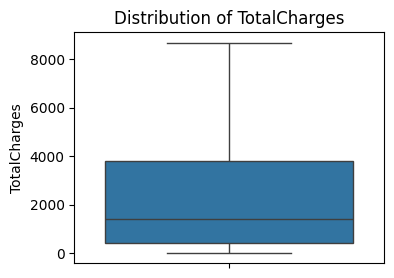

In [145]:
plt.figure(figsize=(4,3))
sns.boxplot(churn['TotalCharges'])
plt.title('Distribution of TotalCharges')
plt.show()

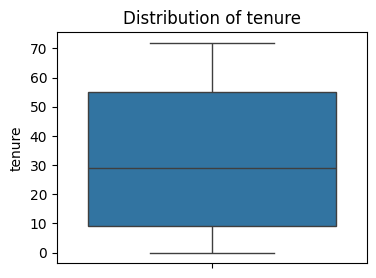

In [146]:
plt.figure(figsize=(4,3))
sns.boxplot(churn['tenure'])
plt.title('Distribution of tenure')
plt.show()

# Correlation Heatmap for numeric columns

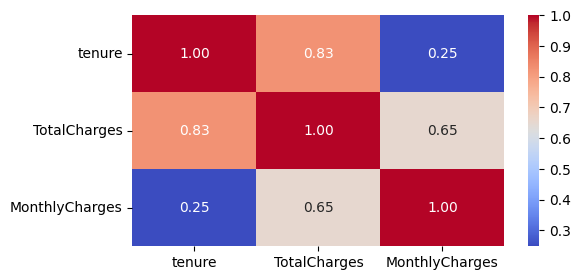

In [147]:
plt.figure(figsize=(6,3))
st.heatmap(churn[['tenure','TotalCharges','MonthlyCharges']].corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

# Categorical feature

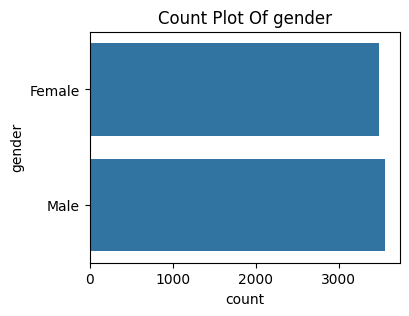

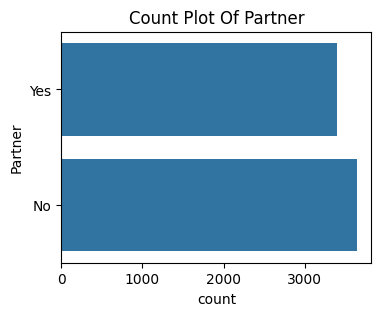

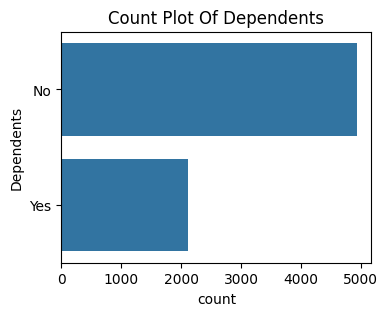

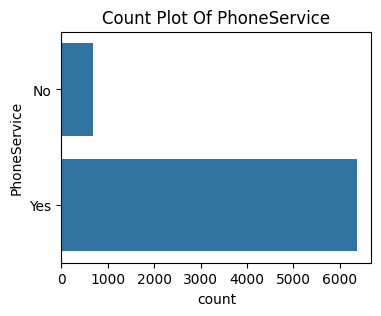

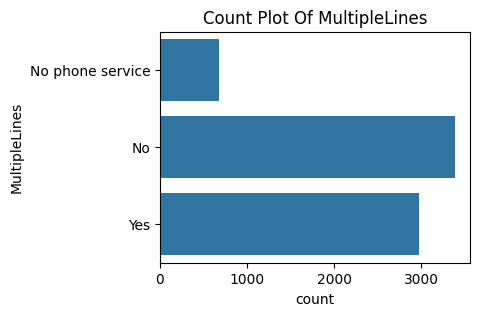

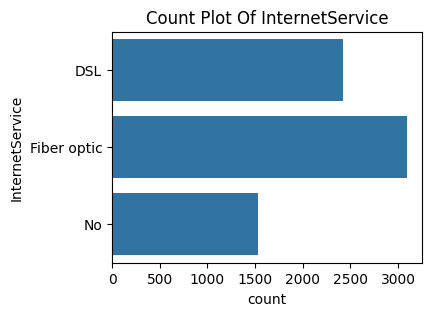

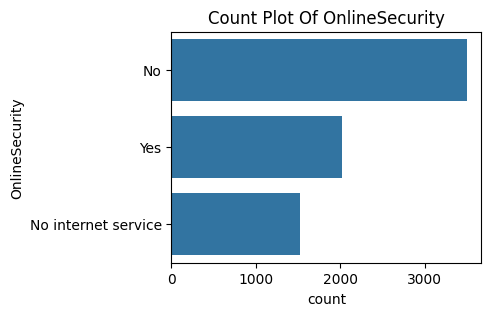

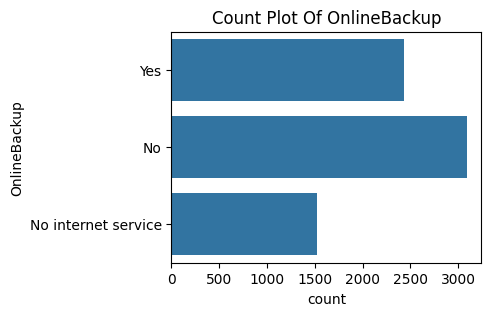

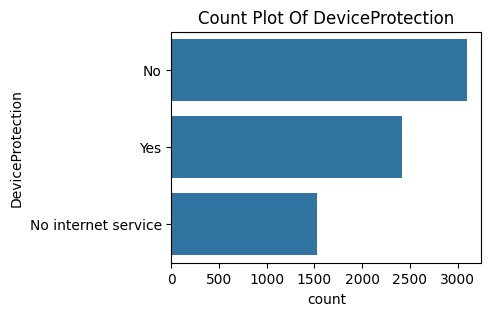

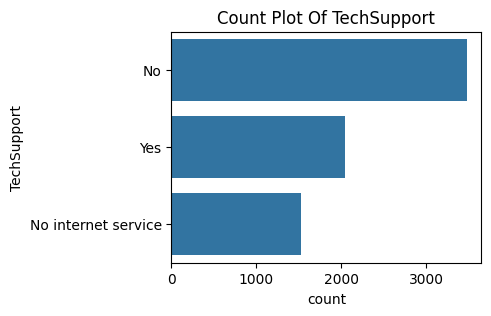

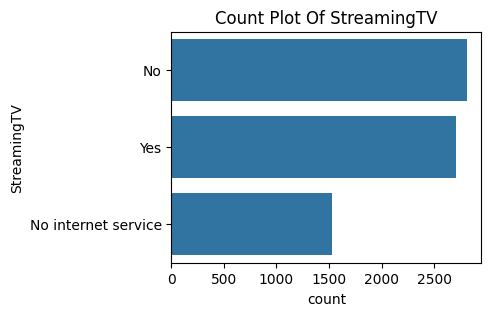

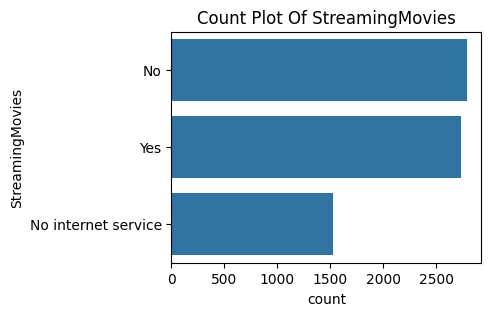

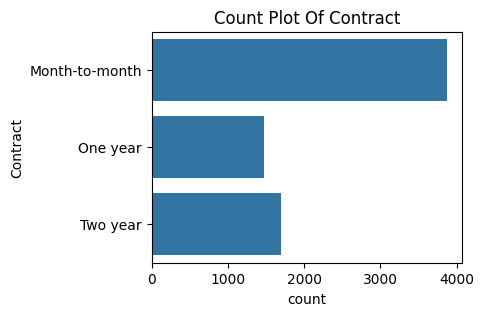

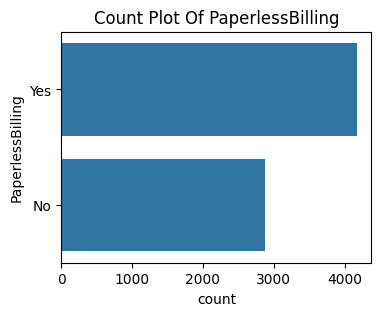

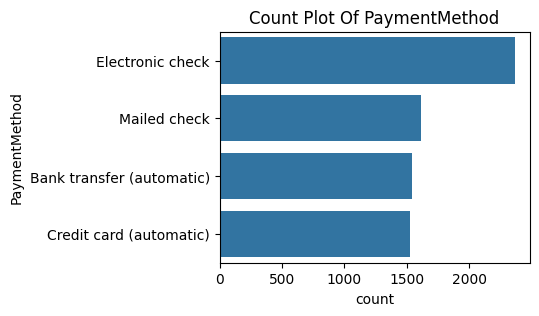

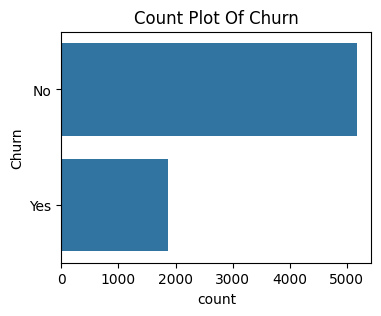

In [148]:
object_col=churn.select_dtypes(include='object').columns.to_list()
for col in object_col:
    plt.figure(figsize=(4,3))
    st.countplot(churn[col])
    plt.title(f'Count Plot Of {col}')

    plt.show()


# Data Preprocessing

In [149]:
# Label Encoding Of Target Columns
churn['Churn']=churn['Churn'].replace({'Yes':1,'No':0})


In [150]:
object_column=churn.select_dtypes(include='object').columns


In [151]:
encoder={}
import joblib
import pickle
 # apply label encoder and save the encoder
for column in object_column:
    label_encoder=LabelEncoder()
    churn[column]=label_encoder.fit_transform(churn[column])
    encoder[column]=label_encoder


    # save the encoder in pkl file
    with open('encoder.pkl','wb') as file:
        pickle.dump(encoder,file)

In [152]:
encoder

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [153]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


# Training And Test Data Split

In [154]:
# Train test split
X=churn.drop(columns=['Churn'])
y=churn['Churn']

In [155]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60


In [165]:
# Split tain and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [157]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,0,0,0,1,21,1,0,0,2,0,2,0,0,2,1,0,3,64.85,1336.80
1623,0,0,0,0,54,1,2,1,0,2,0,0,2,2,2,1,0,97.20,5129.45
6074,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,2,23.45,23.45
1362,1,0,0,0,4,1,0,1,0,0,0,0,0,0,0,1,2,70.20,237.95
6754,1,0,0,1,0,1,2,0,2,2,0,2,0,0,2,1,0,61.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1,0,1,0,1,1,0,1,2,0,0,0,2,2,0,1,2,95.00,95.00
5191,0,0,1,1,23,1,2,0,2,2,2,2,2,2,2,1,1,91.10,2198.30
5226,1,0,1,1,12,1,0,2,1,1,1,1,1,1,0,1,2,21.15,306.05
5390,1,1,0,0,12,1,2,1,0,0,2,0,2,2,0,1,2,99.45,1200.15


In [168]:

fill_value=churn['TotalCharges'].mean()
churn['TotalCharges'].fillna(fill_value,inplace=True)

In [169]:
print(y_train.shape)

(5634,)


In [170]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Synthatic Oversampling Technique Minority And Mijority Class For Imbalnced Datsets

In [171]:
fill_value=churn['TotalCharges'].mean()
churn['TotalCharges'].fillna(fill_value,inplace=True)

In [175]:
smote=SMOTE(random_state=42)


In [183]:
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [185]:
print(y_train_smote.shape)

(8276,)


In [182]:
# Impute missing values in TotalCharges with the mean of the training data
fill_value = X_train['TotalCharges'].mean()
X_train['TotalCharges'].fillna(fill_value, inplace=True)
X_test['TotalCharges'].fillna(fill_value, inplace=True)

In [186]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


# Model Training

In [189]:
# Dictionary Of Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
churn_model={
    "Decision Tree":DecisionTreeClassifier(random_state=42),
    "Random Forest":RandomForestClassifier(random_state=42),
    "Logistic Regression":LogisticRegression(random_state=42),
    "XGBoost":XGBClassifier(random_state=42)
}


In [190]:
# Dictionary to store cross validation score
cv_score= {}

# To perform 5 fold
for model_name,model in churn_model.items():
    print(model_name)
    print(model)
    print("-"*50)

Decision Tree
DecisionTreeClassifier(random_state=42)
--------------------------------------------------
Random Forest
RandomForestClassifier(random_state=42)
--------------------------------------------------
Logistic Regression
LogisticRegression(random_state=42)
--------------------------------------------------
XGBoost
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator

In [193]:
# Dictionary to store cross validation score
cv_score= {}

# To perform 5 fold
for model_name,model in churn_model.items():
   print(f"Training {model_name} with default parametre")
   score=cross_val_score(model,X_train_smote,y_train_smote,cv=5)
   cv_score[model_name]=np.mean(score)
   print(f"Cross validation score for {model_name}:{np.mean(score)}")
   print("-"*50)




Training Decision Tree with default parametre
Cross validation score for Decision Tree:0.7790111213275537
--------------------------------------------------
Training Random Forest with default parametre
Cross validation score for Random Forest:0.8393079819606811
--------------------------------------------------
Training Logistic Regression with default parametre
Cross validation score for Logistic Regression:0.7855297955251981
--------------------------------------------------
Training XGBoost with default parametre
Cross validation score for XGBoost:0.8321791672139762
--------------------------------------------------


In [194]:
cv_score

{'Decision Tree': np.float64(0.7790111213275537),
 'Random Forest': np.float64(0.8393079819606811),
 'Logistic Regression': np.float64(0.7855297955251981),
 'XGBoost': np.float64(0.8321791672139762)}

In [195]:
# Random Forest Gives The More Higest Accuracy Score Compared To Other
churn_Random_forset=RandomForestClassifier(random_state=42)
churn_Random_forset.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

# Model Evaluation

In [196]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


In [197]:
# Evaluate On Test Data
y_test_pred=churn_Random_forset.predict(X_test)
print(f"Accuracy Score:{accuracy_score(y_test,y_test_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test,y_test_pred)}")
print(f"Classification Report:\n{classification_report(y_test,y_test_pred)}")


Accuracy Score:0.7750177430801988
Confusion Matrix:
[[877 159]
 [158 215]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.57      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



In [202]:
# save the trained model and feature names as a pickle file
import pickle
model_data = {
    "model": churn_Random_forset,
    "features_names": X.columns.tolist()
}
with open('churn_model.pkl','wb') as file:
    pickle.dump(model_data, file)

In [203]:
# load the saved model and the feature names

with open("churn_model.pkl", "rb") as f:
  model_data = pickle.load(f)

loaded_model = model_data["model"]
feature_names = model_data["features_names"]

print("Model loaded successfully.")
print("Feature names loaded:", feature_names)

Model loaded successfully.
Feature names loaded: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [204]:
print(loaded_model)

RandomForestClassifier(random_state=42)


In [206]:
input_data = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}


input_data_df = pd.DataFrame([input_data])

with open("encoder.pkl", "rb") as f:
  encoders = pickle.load(f)


# encode categorical featires using teh saved encoders
for column, encoder in encoders.items():
  input_data_df[column] = encoder.transform(input_data_df[column])

# make a prediction
prediction = loaded_model.predict(input_data_df)
pred_prob = loaded_model.predict_proba(input_data_df)

print(prediction)

# results
print(f"Prediction: {'Churn' if prediction[0] == 1 else 'No Churn'}")
print(f"Prediciton Probability: {pred_prob}")


[0]
Prediction: No Churn
Prediciton Probability: [[0.8 0.2]]
